## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import tensorflow.keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [20]:
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tensorflow.keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = tensorflow.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Epoch 48/50
50000/50000 [==============================] - 6s 113us/sample - loss: 1.6203 - accuracy: 0.5217 - val_loss: 1.7006 - val_accuracy: 0.4894
Epoch 49/50
50000/50000 [==============================] - 6s 111us/sample - loss: 1.6149 - accuracy: 0.5202 - val_loss: 1.6741 - val_accuracy: 0.5000
Epoch 50/50
50000/50000 [==============================] - 6s 112us/sample - loss: 1.6120 - accuracy: 0.5247 - val_loss: 1.7541 - val_accuracy: 0.4771
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________

50000/50000 [==============================] - 6s 118us/sample - loss: 1.0753 - accuracy: 0.6736 - val_loss: 1.5225 - val_accuracy: 0.5204
Epoch 46/50
50000/50000 [==============================] - 6s 117us/sample - loss: 1.0623 - accuracy: 0.6772 - val_loss: 1.5825 - val_accuracy: 0.5105
Epoch 47/50
50000/50000 [==============================] - 6s 114us/sample - loss: 1.0494 - accuracy: 0.6798 - val_loss: 1.5071 - val_accuracy: 0.5294
Epoch 48/50
50000/50000 [==============================] - 6s 116us/sample - loss: 1.0378 - accuracy: 0.6869 - val_loss: 1.5275 - val_accuracy: 0.5228
Epoch 49/50
50000/50000 [==============================] - 6s 116us/sample - loss: 1.0259 - accuracy: 0.6896 - val_loss: 1.5857 - val_accuracy: 0.5163
Epoch 50/50
50000/50000 [==============================] - 6s 115us/sample - loss: 1.0176 - accuracy: 0.6920 - val_loss: 1.5142 - val_accuracy: 0.5275
Experiment with Regulizer = 0.000000
Model: "model"
______________________________________________________

50000/50000 [==============================] - 6s 121us/sample - loss: 1.0084 - accuracy: 0.6451 - val_loss: 1.3795 - val_accuracy: 0.5227
Epoch 40/50
50000/50000 [==============================] - 6s 120us/sample - loss: 0.9933 - accuracy: 0.6499 - val_loss: 1.3418 - val_accuracy: 0.5350
Epoch 41/50
50000/50000 [==============================] - 5s 110us/sample - loss: 0.9842 - accuracy: 0.6548 - val_loss: 1.3908 - val_accuracy: 0.5219
Epoch 42/50
50000/50000 [==============================] - 5s 110us/sample - loss: 0.9698 - accuracy: 0.6590 - val_loss: 1.3740 - val_accuracy: 0.5295
Epoch 43/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.9590 - accuracy: 0.6624 - val_loss: 1.3586 - val_accuracy: 0.5286
Epoch 44/50
50000/50000 [==============================] - 6s 112us/sample - loss: 0.9494 - accuracy: 0.6645 - val_loss: 1.3511 - val_accuracy: 0.5335
Epoch 45/50
50000/50000 [==============================] - 6s 115us/sample - loss: 0.9315 - accuracy: 0.67

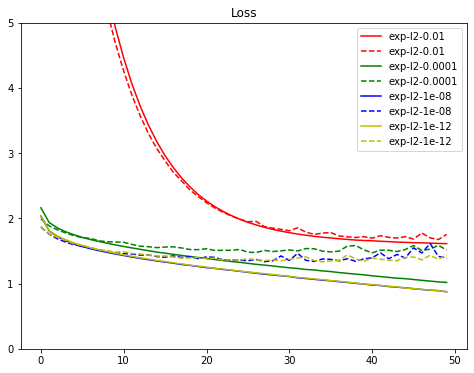

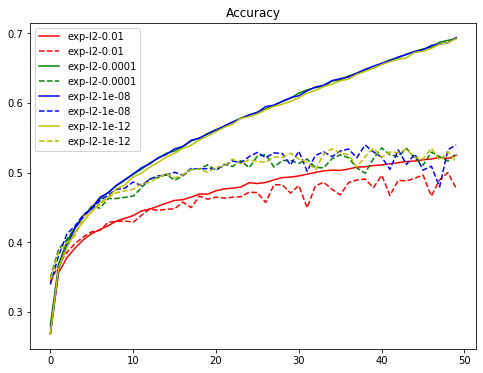

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()